In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("payment_fraud_data.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5 non-null      int64  
 1   type            5 non-null      object 
 2   amount          5 non-null      float64
 3   nameOrig        5 non-null      object 
 4   oldbalanceOrg   5 non-null      float64
 5   newbalanceOrig  5 non-null      float64
 6   nameDest        5 non-null      object 
 7   oldbalanceDest  5 non-null      float64
 8   newbalanceDest  5 non-null      float64
 9   isFraud         5 non-null      int64  
 10  isFlaggedFraud  5 non-null      int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 572.0+ bytes


type
PAYMENT     3
TRANSFER    1
CASH_OUT    1
Name: count, dtype: int64


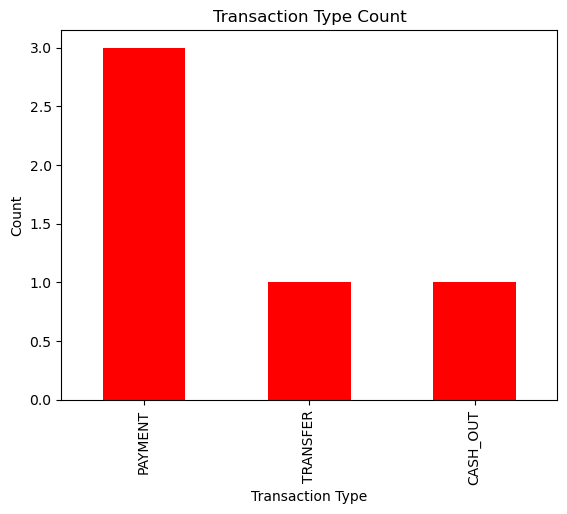

In [36]:
type_counts = data["type"].value_counts()
print(type_counts)

type_counts.plot(kind='bar', color='red')
plt.title("Transaction Type Count")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [46]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [48]:
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [56]:
from sklearn.svm import SVC
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model =  SVC(kernel = 'linear', random_state = 0)
model.fit(xtrain, ytrain)

C:\Users\saisa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [58]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
if model.predict(features)== 1:
    print("Fraud")
else:
    print("No Fraud")

Fraud
